In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import xgboost as xgb
import lightgbm as lgb

In [2]:
df = pd.read_csv('SP 500 ESG Risk Ratings.csv')

In [3]:
df = df.drop(columns=['Symbol', 'Name', 'Address', 'Description', 'ESG Risk Percentile'])

In [4]:
# Compute the correlation matrix
# Check for null values
null_values = df.isna().sum()
columns_with_null = null_values[null_values > 0]

# Display columns with null values
print("Columns with null values:")
print(columns_with_null)


Columns with null values:
Sector                      1
Industry                    1
Full Time Employees         5
Total ESG Risk score       73
Environment Risk Score     73
Governance Risk Score      73
Social Risk Score          73
Controversy Level          73
Controversy Score         100
ESG Risk Level             73
dtype: int64


In [5]:
# Impute missing values
for column, count in columns_with_null.items():
    if df[column].dtype == 'object':  # Handling categorical columns
        # Fill with mode (most frequent value)
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
    else:  # Handling numerical columns
        # Fill with mean
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

# Verify null values after imputation
print("\nNull values after imputation:")
print(df.isna().sum())
df.tail()


Null values after imputation:
Sector                    0
Industry                  0
Full Time Employees       0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Level            0
dtype: int64


,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Level
498,Technology,Information Technology Services,"742,000",9.8,0.8,4.4,4.6,Moderate Controversy Level,2.0,Negligible
499,Healthcare,Drug Manufacturers - General,"50,000",29.9,2.4,10.4,17.2,Significant Controversy Level,3.0,Medium
500,Healthcare,Medical Devices,"114,000",24.8,2.3,8.3,14.2,Significant Controversy Level,3.0,Medium
501,Industrials,Specialty Industrial Machinery,"12,000",25.4,7.2,6.4,11.9,Low Controversy Level,1.0,Medium
502,Industrials,Conglomerates,"85,000",37.3,17.2,6.5,13.6,Severe Controversy Level,5.0,High


In [6]:
# Define your categorical columns
categorical_columns = ['Sector', 'Industry', 'Controversy Level', 'ESG Risk Level']

# Remove commas from numeric columns and convert to float
numeric_columns = ['Full Time Employees']
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [7]:
# Ensure that the categorical columns are correctly handled
df[categorical_columns] = df[categorical_columns].astype(str)
    
# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [8]:
# Clean feature names to ensure they do not contain special characters
df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]

In [9]:
# Check the data types of all columns in X
print("Data types after cleaning:", df.dtypes)

Data types after cleaning: Full_Time_Employees                                float64
Total_ESG_Risk_score                               float64
Environment_Risk_Score                             float64
Governance_Risk_Score                              float64
Social_Risk_Score                                  float64
                                                    ...   
Controversy_Level_Significant_Controversy_Level       bool
ESG_Risk_Level_Low                                    bool
ESG_Risk_Level_Medium                                 bool
ESG_Risk_Level_Negligible                             bool
ESG_Risk_Level_Severe                                 bool
Length: 140, dtype: object


In [10]:
# Clean feature names to ensure they do not contain special characters
df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]

# Define features and target
X = df.drop('Total_ESG_Risk_score', axis=1)  # Ensure the correct column name is used for dropping
y = df['Total_ESG_Risk_score']

In [11]:
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 4: Initialize the models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

In [13]:
# Step 5: Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} Mean Squared Error: {mse}")

Random Forest Mean Squared Error: 1.7124022774191652
Gradient Boosting Mean Squared Error: 1.294920664591037
Linear Regression Mean Squared Error: 0.003489918687516639
XGBoost Mean Squared Error: 3.6665089177851797
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 21
[LightGBM] [Info] Start training from score 21.484386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

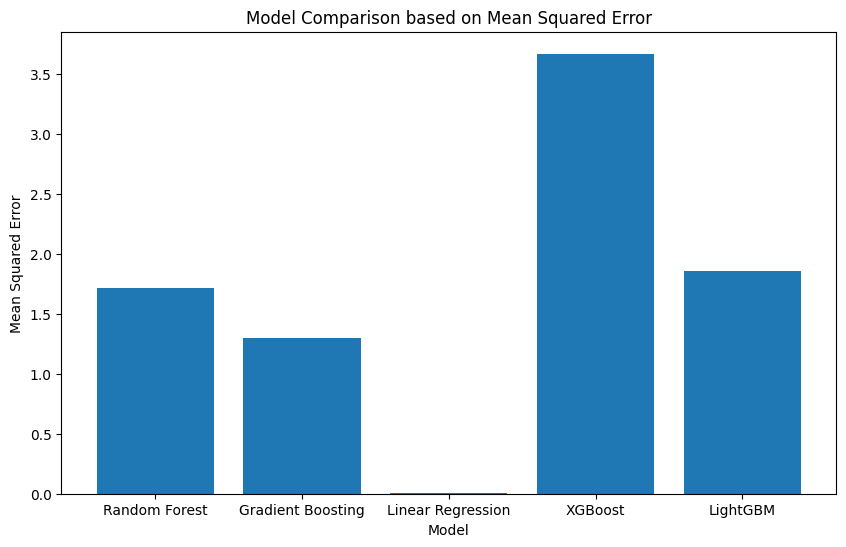

In [14]:
# Step 6: Compare the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison based on Mean Squared Error')
plt.show()

In [15]:
# Optional: Visualize feature importances for the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

In [16]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns
    indices = np.argsort(importances)
    plt.figure(figsize=(12, 8))
    plt.title(f'Feature Importances ({best_model_name})')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
else:
    print(f"The model {best_model_name} does not support feature importances.")

The model Linear Regression does not support feature importances.
